# Stochastic Gradient Descent

Gradient Descent uses the whole training set to compute th gradient at every step. This makes is very slow when the training set is large. Stochastic Gradient Descent picks a random instance in the training set at every step and computes the gradient based only on that single instrance

In [36]:
import numpy as np
import matplotlib.pyplot as plt

Let's generate some random dataset

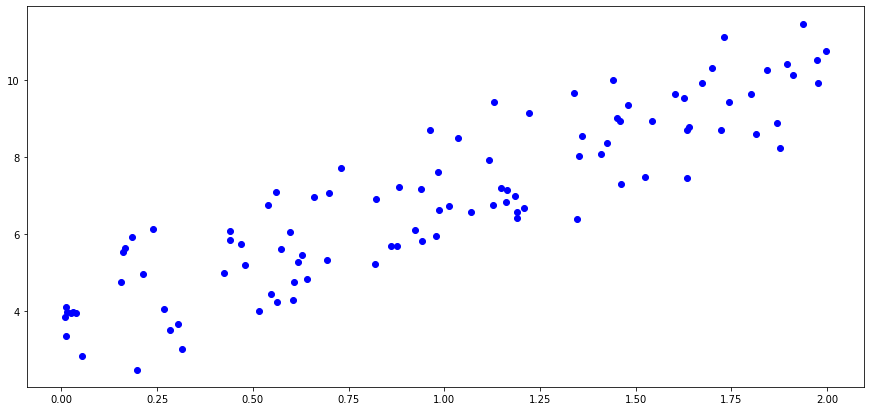

In [37]:
m = 100
x = 2*np.random.rand(m,1) #m uniformly distributed random numbers over [0,2]
y = 4+3*x+np.random.randn(m,1) #line + random Gaussian noise
plt.figure(figsize=(15,7))
plt.plot(x,y,'bo')

In [38]:
X = np.c_[np.ones(m),x]

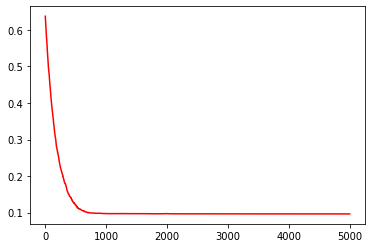

In [39]:
'Stochastic Gradient Descent (SGD)'
n_iterations = 5000 #number of SGD steps
theta = np.random.rand(2,1) #random initialization
MSE = np.zeros((n_iterations,1)) #we will compute the MSE function after each SGD step
s = 0.1 #learning rate

for i in range(n_iterations):
    random_row = np.random.randint(m) #pick a random integer in [0,m-1]
    xi = X[random_row] #ith row; 
    xi = xi[None,:] #keep xi as a row vector
    yi = y[random_row]
    gradient = (2/m)*xi.T@(xi@theta-yi)
    theta = theta - s*gradient
    MSE[i] = np.linalg.norm(y-X@theta)/m
    
plt.plot(MSE,'r-')

Stochastic Gradient Descent is much less regular than Gradient Descent. Instead of gently decreasing until it reaches the minimum, the MSE cost function bounce up and down, decreasing only on average.

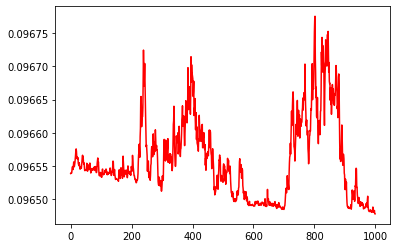

In [40]:
plt.plot(MSE[4000:],'r-')

One solution is to gradually reduce the learning rate

In [41]:
s0,s1 = 5, 50 #learning function hyperparameters
def learning_function(t):
    return s0/(t+s1)

Text(0.5, 1.0, 'learning rate schedule')

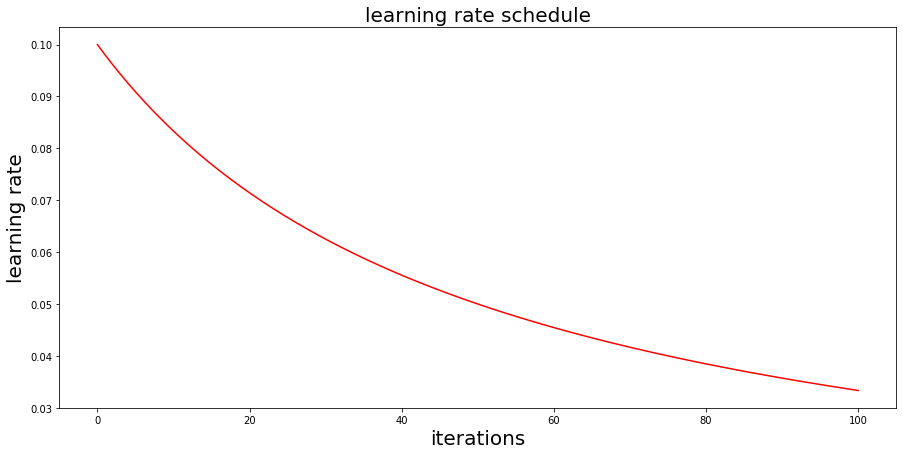

In [42]:
'plot learning function'
t_plot = np.linspace(0,100,1000)
f_plot = learning_function(t_plot)

plt.figure(figsize=(15,7))
plt.plot(t_plot,f_plot,'r-')
plt.xlabel('iterations',fontsize=20)
plt.ylabel('learning rate',fontsize=20)
plt.title('learning rate schedule',fontsize=20)

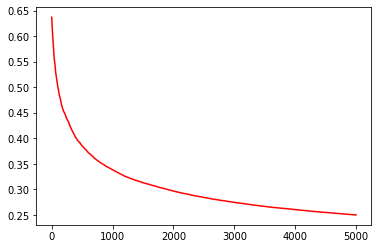

In [43]:
'Stochastic Gradient Descent (SGD) with a learning function'
n_iterations = 5000 #number of SGD steps
theta = np.random.rand(2,1) #random initialization
MSE = np.zeros((n_iterations,1)) #we will compute the MSE function after each SGD step

for i in range(n_iterations):
    random_row = np.random.randint(m) #pick a random integer in [0,m-1]
    xi = X[None,random_row] #keep xi as a row vector
    yi = y[random_row]
    gradient = (2/m)*xi.T@(xi@theta-yi)
    theta = theta - s*gradient
    s = learning_function(i)
    MSE[i] = np.linalg.norm(y-X@theta)/m
    
plt.plot(MSE,'r-')

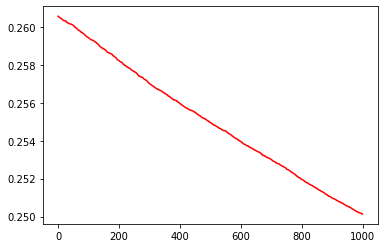

In [44]:
plt.plot(MSE[4000:],'r-')

## Stochastic Gradient Descent Function

In [45]:
def linregression_SGD(X,y,n_epochs):
    m,n = X.shape
    theta = np.random.randn(2,1) #random initialization
    
    for epoch in range(n_epochs):
        for i in range(m):
            random_row = np.random.randint(m)
            xi = X[None,random_row] #keep xi as a row vector
            yi = y[random_row]
            gradient = 2*xi.T@(xi@theta-yi)
            s = learning_function(epoch*m+i)
            theta = theta - s*gradient
    return theta

Text(0.5, 1.0, 'MSE = 0.09652089850928137')

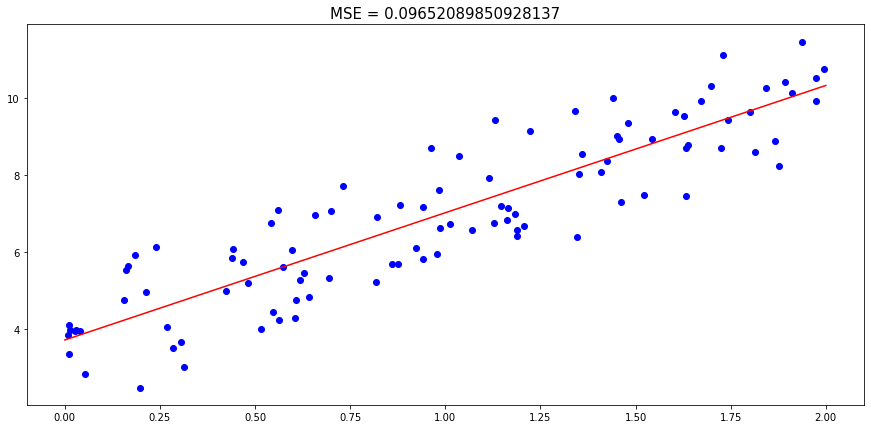

In [46]:
'testing linregression_SGD'
n_epochs = 50
s0,s1 = 5,50
theta = linregression_SGD(X,y,n_epochs)

"MSE"
MSE = np.linalg.norm(X@theta-y)/m

plt.figure(figsize=(15,7))
plt.plot(x,y,'bo')

x_plot = np.array([0,2])
y_plot = theta[0]+theta[1]*x_plot
plt.plot(x_plot,y_plot,'r-')

plt.title('MSE = '+str(MSE),fontsize=15)